In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
d=pd.read_csv("Postures.csv")
d.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [4]:
d.shape  #THERE ARE TOTAL 78096 ROWS AND 38 FEATURES

(78096, 38)

In [5]:
d.info()   #THERE ARE 3 TYPES OF DATA:- float64(9),int64(2),object(27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [6]:
d.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [7]:
d.replace('?',np.nan,inplace=True)  #REPLACING THE '?' VALUE BY Nan value

In [8]:
d.head(5)

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d.Class=d.Class.astype("int")

In [10]:
d.X3=d.Y3.astype(float)
d.Y3=d.Y3.astype(float)
d.Z3=d.Z3.astype(float)
d.X4=d.X4.astype(float)
d.Y4=d.Y4.astype(float)
d.Z4=d.Z4.astype(float)
d.X5=d.X5.astype(float)
d.Y5=d.Y5.astype(float)
d.Z5=d.Z5.astype(float)
d.X6=d.X6.astype(float)
d.Y6=d.Y6.astype(float)
d.Z6=d.Z6.astype(float)

In [11]:
d.drop(["User",'X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'],axis=1,inplace=True)

In [12]:
df=d[d.Class!=0]
df.head(4)

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
1,1,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,NaN,NaN,NaN,NaN,NaN,NaN
2,1,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,NaN,NaN,NaN,NaN,NaN,NaN
3,1,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import impyute as impy

In [14]:
df=impy.mean(df)


In [15]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [16]:
df.head(4)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,...,-73.684130,59.188576,10.678936,-71.297781,47.042778,81.394937,-30.27037,45.677699,83.732313,-26.639238
1,1.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,...,-70.703991,61.587452,11.779919,-68.827418,47.042778,81.394937,-30.27037,45.677699,83.732313,-26.639238
2,1.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,...,-71.138344,61.686427,11.793440,-68.889316,47.042778,81.394937,-30.27037,45.677699,83.732313,-26.639238
3,1.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,...,-68.956425,77.387225,42.717833,-72.015146,47.042778,81.394937,-30.27037,45.677699,83.732313,-26.639238


In [17]:
x=df.drop(0,axis=1)
y=df[0]

In [18]:
y.head(4)

0    1.0
1    1.0
2    1.0
3    1.0
Name: 0, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10) #split the data into 70%-30%

In [20]:
rfc=RandomForestClassifier(random_state=2).fit(x_train,y_train)
predict=rfc.predict(x_test)
print('Train Score:',rfc.score(x_train,y_train))
print('Test Score:',rfc.score(x_test,y_test))
print('Accuracy Score',accuracy_score(y_test,predict))
print('Cohen Kappa Score',cohen_kappa_score(y_test,predict))  # applying randomforest we get 0.79 accuracy score
print('Matthews Score',matthews_corrcoef(y_test,predict)) #train data is overfitted  #cohen kappa score is less than 0.5 so it is imbalanced

Train Score: 0.9992865766655691
Test Score: 0.9526655000213411
Accuracy Score 0.9526655000213411
Cohen Kappa Score 0.9408083402947903
Matthews Score 0.9408318735834827


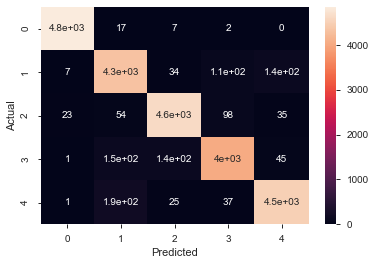

In [21]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
print(classification_report(y_test,predict)) #as the recall values are having different values we need to scale and rebuild the model to get more accuracy.

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      4869
         2.0       0.91      0.94      0.93      4619
         3.0       0.96      0.96      0.96      4826
         4.0       0.94      0.92      0.93      4373
         5.0       0.95      0.95      0.95      4742

    accuracy                           0.95     23429
   macro avg       0.95      0.95      0.95     23429
weighted avg       0.95      0.95      0.95     23429

